In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
from ensembles import *

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


# Предобработка данных

In [3]:
X = pd.read_csv('./kc_house_data.csv')
X

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
X.shape

(21613, 21)

In [5]:
X.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
y = X.pop('price')

In [7]:
unique_values = {feature: X[feature].nunique() for feature in X.columns}
unique_values

{'bathrooms': 30,
 'bedrooms': 13,
 'condition': 5,
 'date': 372,
 'floors': 6,
 'grade': 12,
 'id': 21436,
 'lat': 5034,
 'long': 752,
 'sqft_above': 946,
 'sqft_basement': 306,
 'sqft_living': 1038,
 'sqft_living15': 777,
 'sqft_lot': 9782,
 'sqft_lot15': 8689,
 'view': 5,
 'waterfront': 2,
 'yr_built': 116,
 'yr_renovated': 70,
 'zipcode': 70}

Судя по названиям и типам, большинство признаков можно отнести к вещественным, некоторые - к категориальным (например, condition, view, waterfront). На фоне остальных выделяется признак date, переведем его в формат datetime

In [8]:
X['date'] = pd.to_datetime(X['date'])

In [9]:
X.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
pd.set_option('display.max_rows', X.shape[1])
stat_info = X.agg(['mean', 'var'])
print(stat_info.T)
pd.reset_option('display.max_rows')

                                        mean          var
id                                4.5803e+09  8.27463e+18
date           2014-10-29 04:38:01.959918592          NaT
bedrooms                             3.37084     0.865015
bathrooms                            2.11476     0.593151
sqft_living                           2079.9       843534
sqft_lot                               15107  1.71566e+09
floors                               1.49431     0.291588
waterfront                        0.00754176   0.00748523
view                                0.234303     0.587243
condition                            3.40943     0.423467
grade                                7.65687       1.3817
sqft_above                           1788.39       685735
sqft_basement                        291.509       195873
yr_built                             1971.01      862.797
yr_renovated                         84.4023       161346
zipcode                              98077.9      2862.79
lat           

In [11]:
X.drop(columns=['id'], inplace=True)

Признак date можно преобразовать из datetime в числовой формат. Дату можно закодировать некоторым одним числом (число секунд напимер) или разбить на год, месяц, день и т. д., т. е. создать новые признаки. Так как в рассматриваемой задаче предсказывается цена дома, и признак date, вероятно, соответствует времени выставления дома на продажу, то второй вариант преобразования может иметь смысл, ибо некоторая сезонность или принадлежность конкретному временному периоду может иметь значение на рынке недвижимости и, соотвтетственно, будет влиять на цену. Можно учесть и день недели, возможно в будни и выходные продажи идут по разному. 

In [12]:
X['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [13]:
X['year'] = X['date'].dt.year
X['month'] = X['date'].dt.month
X['day'] = X['date'].dt.day
X['weekday'] = X['date'].dt.weekday
X.drop(columns=['date'], inplace=True)

К категориальным признакам явно можно отнести waterfront, condition, view. Эти признаки целочисленны, их не так много, оставим их без преобразований.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy().ravel(), test_size=0.3)

# Исследование алгоритма случайный лес

In [15]:
params = {'X': X_train, 'y': y_train, 'X_val': X_test, 'y_val': y_test, 'return_train_loss': True}

За максимум количества деревьев возьмем 1000

In [ ]:
model = RandomForestMSE(n_estimators=1000)
train_loss, val_loss, times = model.fit(**params)

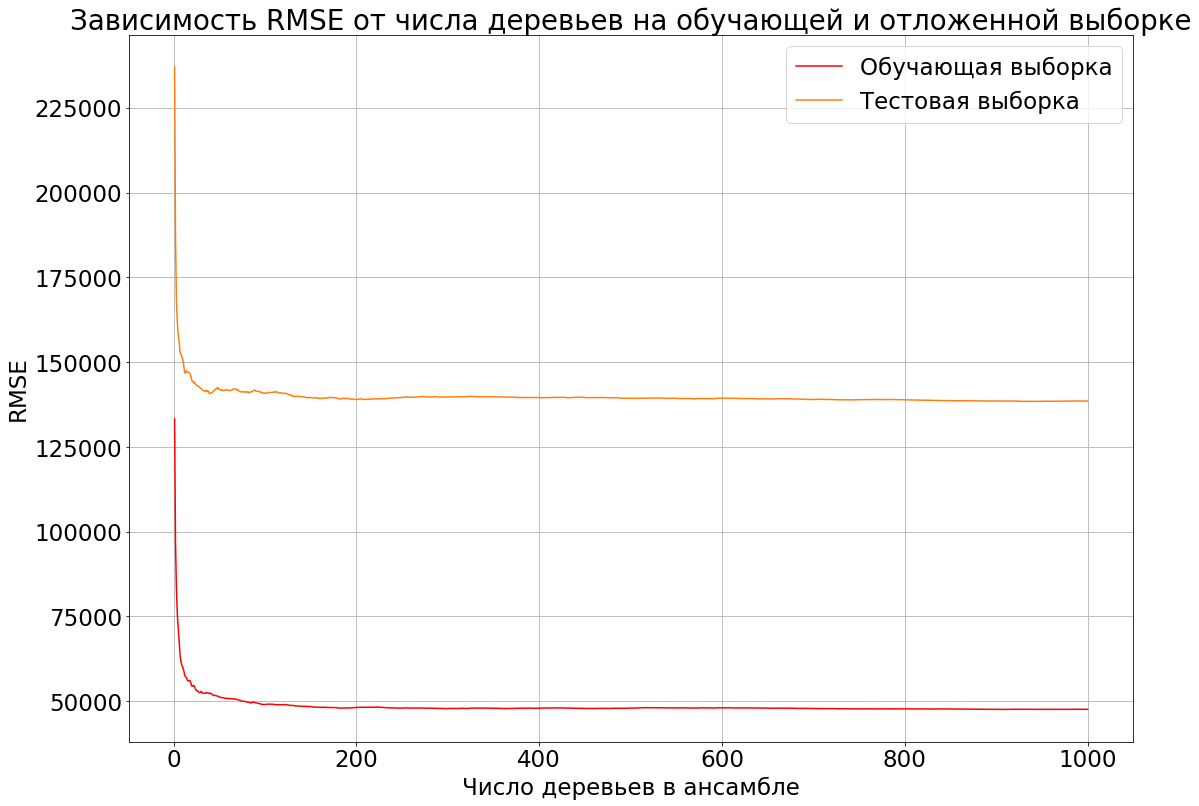

In [ ]:
plt.figure(figsize=(18,13))
plt.title('Зависимость RMSE от числа деревьев на обучающей и отложенной выборке')
plt.xlabel('Число деревьев в ансамбле')
plt.ylabel('RMSE')
plt.plot(np.arange(1000)+1, train_loss, label='Обучающая выборка', c='r')
plt.plot(np.arange(1000)+1, val_loss, label='Тестовая выборка', c='tab:orange')
plt.legend()
plt.grid(True)
plt.rc('font', size=23)
plt.savefig(fname='RF_tree_RMSE', format='pdf')
plt.show()

In [ ]:
optimal_num_train = np.argmin(train_loss) + 1
optimal_num_val = np.argmin(val_loss) + 1
print(f'Optimal trees number on train: {optimal_num_train}')
print(f'Best RMSE: {train_loss[optimal_num_train - 1]}')
print(f'Optimal trees number on validation: {optimal_num_val}')
print(f'Best RMSE: {val_loss[optimal_num_val - 1]}')

Optimal trees number on train: 250
Best RMSE: 48163.95934559543
Optimal trees number on validation: 238
Best RMSE: 134345.6167629119


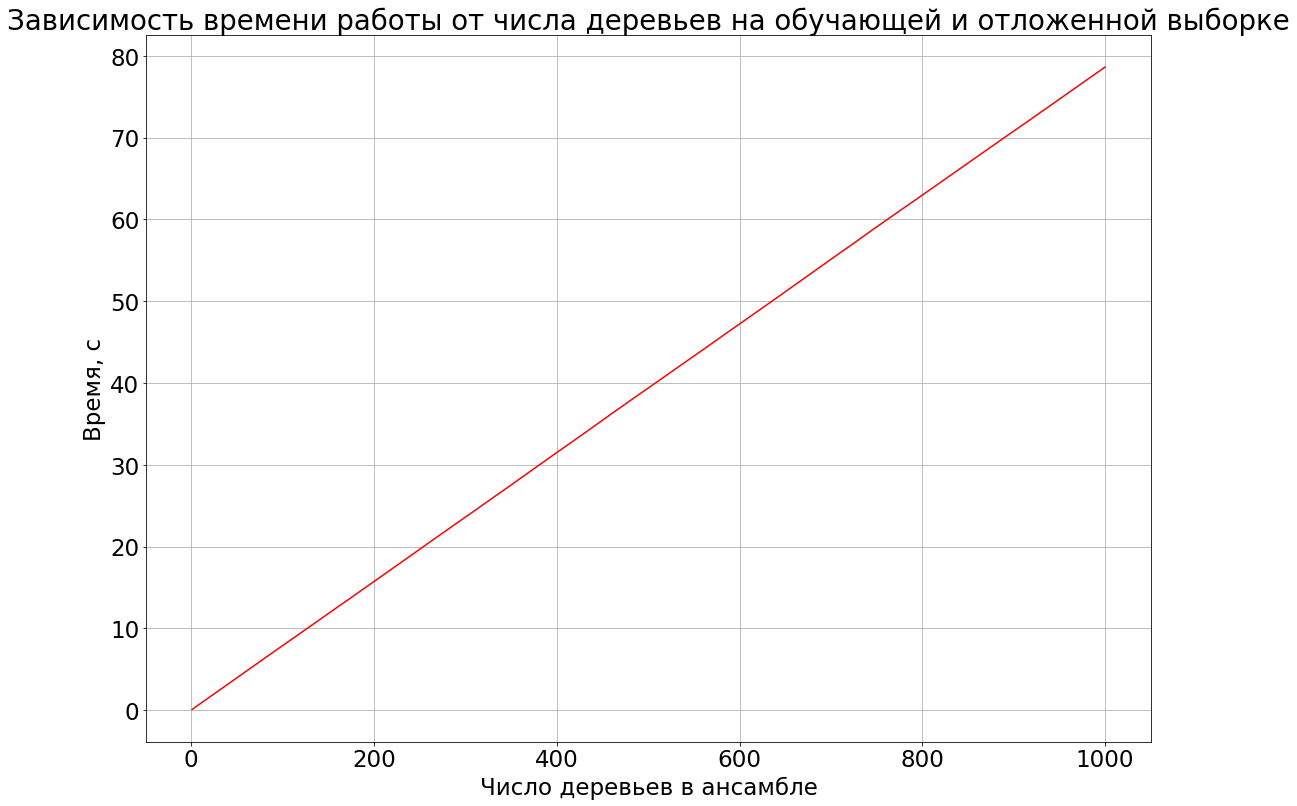

In [ ]:
plt.figure(figsize=(18,13))
plt.title('Зависимость времени работы от числа деревьев на обучающей и отложенной выборке')
plt.xlabel('Число деревьев в ансамбле')
plt.ylabel('Время, с')
plt.plot(np.arange(1000)+1, times, c='r')
plt.grid(True)
plt.rc('font', size=23)
plt.savefig(fname='RF_tree_time', format='pdf')
plt.show()

Далее можем рассматривать количество деревьев, равное 250, как оптимальное применительно к данной задаче, так как примерно после данного количества значение функции потерь выходит на асимптоту. Будем также использовать данное значение параметра в дальнейшем для экономии времени.

Рассмторим зависимость качества и времени от количества признаков для дерева. Всего признаков немного, удобно будет перебрать все возможные.

In [ ]:
train_loss_fs = []
val_loss_fs = []
times_fs = []
for i in range(1, X_train.shape[1] + 1):
    model = RandomForestMSE(n_estimators=250, feature_subsample_size=i)
    train_loss, val_loss, times = model.fit(**params)
    train_loss_fs.append(train_loss[-1])
    val_loss_fs.append(val_loss[-1])
    times_fs.append(times[-1])

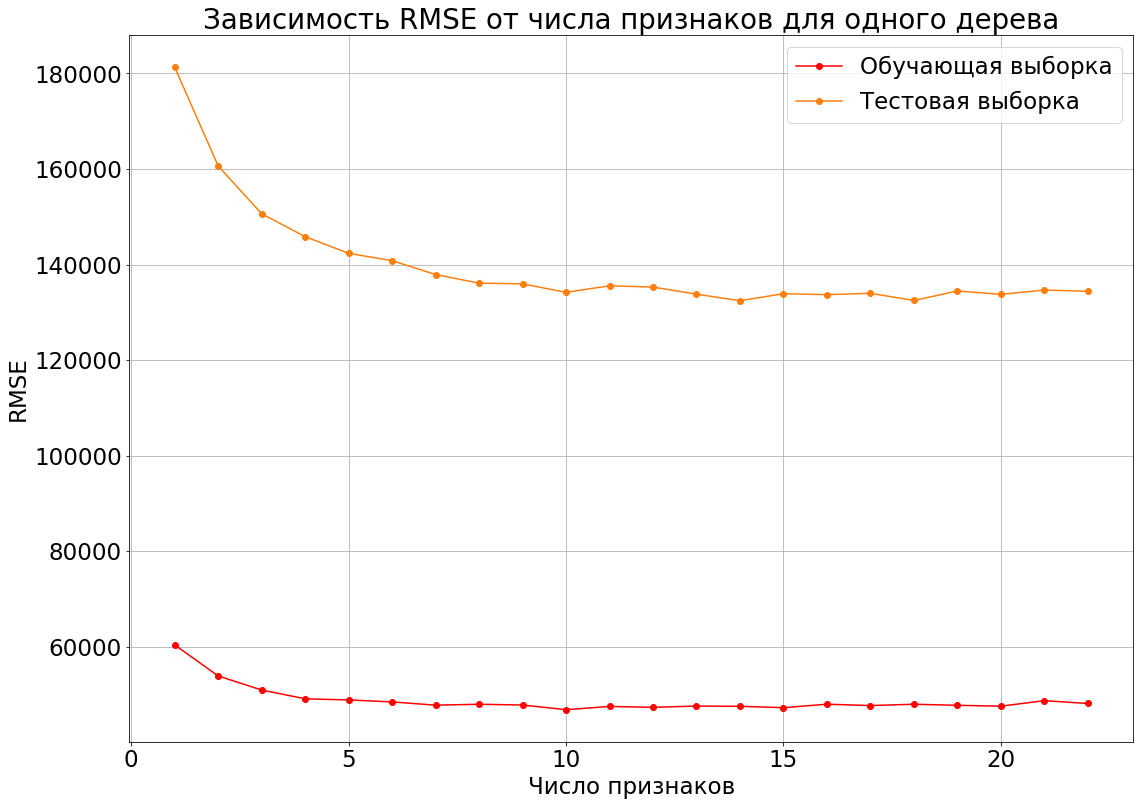

In [ ]:
plt.figure(figsize=(18,13))
plt.title('Зависимость RMSE от числа признаков для одного дерева')
plt.xlabel('Число признаков')
plt.ylabel('RMSE')
plt.plot(np.arange(X_train.shape[1])+1, train_loss_fs, label='Обучающая выборка', c='r', marker='o')
plt.plot(np.arange(X_train.shape[1])+1, val_loss_fs, label='Тестовая выборка', c='tab:orange', marker='o')
plt.legend()
plt.grid(True)
plt.rc('font', size=23)
plt.savefig(fname='RF_fs_RMSE', format='pdf')
plt.show()

In [ ]:
optimal_fnum_train = np.argmin(train_loss_fs) + 1
optimal_fnum_val = np.argmin(val_loss_fs) + 1
print(f'Optimal features number on train: {optimal_fnum_train}')
print(f'Best RMSE: {train_loss_fs[optimal_fnum_train - 1]}')
print(f'Optimal features number on validation: {optimal_fnum_val}')
print(f'Best RMSE: {val_loss_fs[optimal_fnum_val - 1]}')

Optimal features number on train: 10
Best RMSE: 46867.06410165275
Optimal features number on validation: 14
Best RMSE: 132439.0638036619


За оптимальное число признаков можно взять 14.

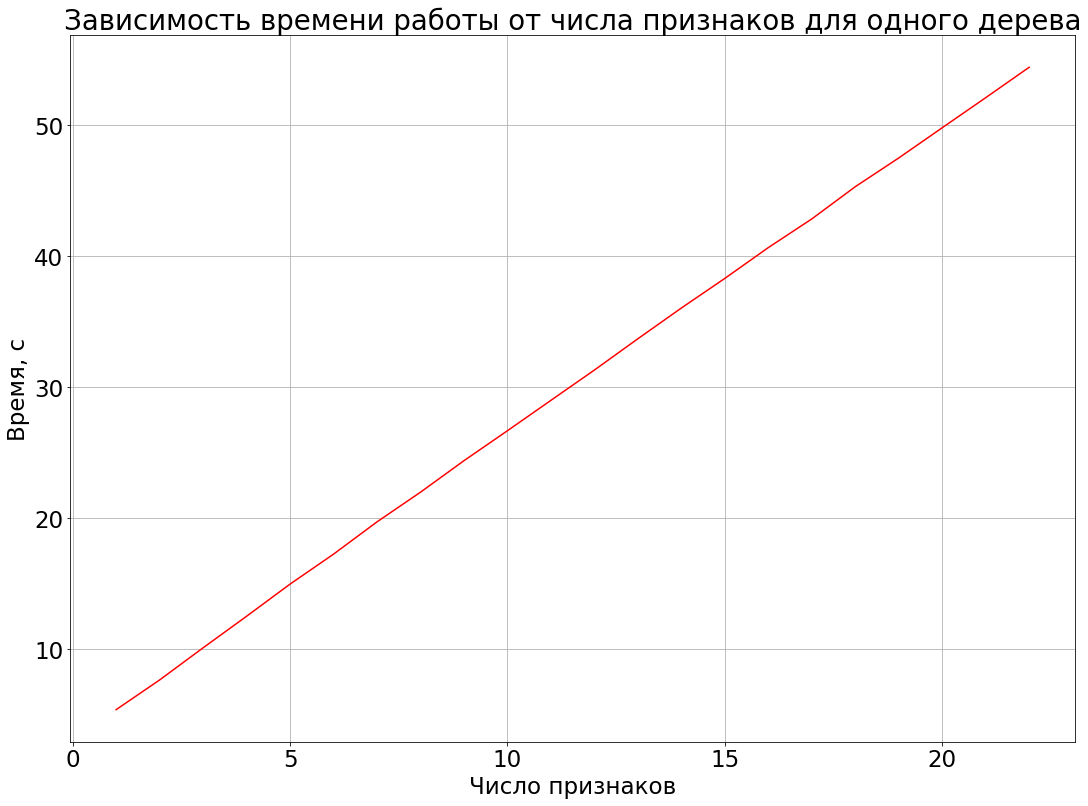

In [ ]:
plt.figure(figsize=(18,13))
plt.title('Зависимость времени работы от числа признаков для одного дерева')
plt.xlabel('Число признаков')
plt.ylabel('Время, с')
plt.plot(np.arange(X_train.shape[1])+1, times_fs, c='r')
plt.grid(True)
plt.rc('font', size=23)
plt.savefig(fname='RF_fs_time', format='pdf')
plt.show()

В датасете 21 признак. Переберем значения глубины от 1 до 30 с учетом возможности задать неограниченную глубину.

In [ ]:
train_loss_d = []
val_loss_d = []
times_d = []

param_grid = list(range(1, 31)) + [None]

for i in param_grid:
    model = RandomForestMSE(n_estimators=250, feature_subsample_size=14, max_depth=i)
    train_loss, val_loss, times = model.fit(**params)
    train_loss_d.append(train_loss[-1])
    val_loss_d.append(val_loss[-1])
    times_d.append(times[-1])

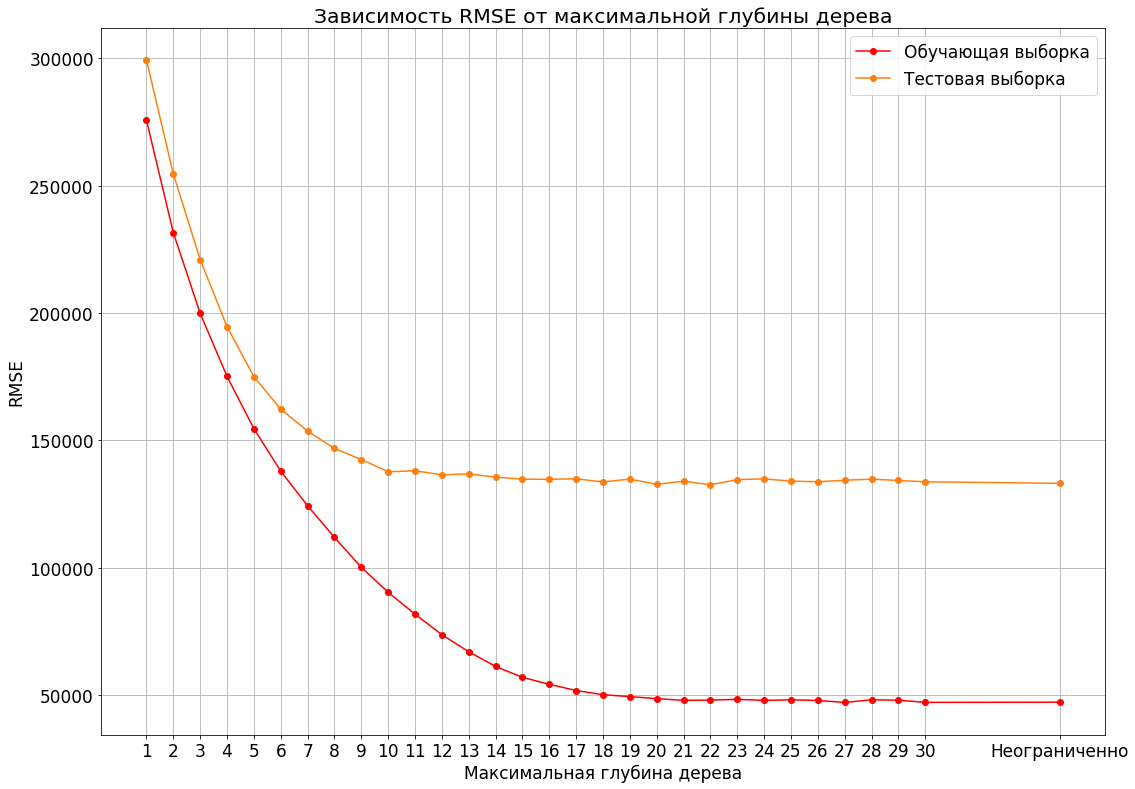

In [ ]:
plt.figure(figsize=(18,13))
plt.title('Зависимость RMSE от максимальной глубины дерева')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('RMSE')
plt.plot(param_grid[:-1]+[35], train_loss_d, label='Обучающая выборка', c='r', marker='o')
plt.plot(param_grid[:-1]+[35], val_loss_d, label='Тестовая выборка', c='tab:orange', marker='o')
plt.xticks(ticks=param_grid[:-1]+[35], labels=param_grid[:-1]+['Неограниченно'])
plt.legend()
plt.grid(True)
plt.rc('font', size=15)
plt.savefig(fname='RF_d_RMSE', format='pdf')
plt.show()

In [ ]:
optimal_dnum_train = np.argmin(train_loss_d) + 1
optimal_dnum_val = np.argmin(val_loss_d) + 1
print(f'Optimal max depth on train: {optimal_dnum_train}')
print(f'Best RMSE: {train_loss_d[optimal_dnum_train - 1]}')
print(f'Optimal max depth on validation: {optimal_dnum_val}')
print(f'Best RMSE: {val_loss_d[optimal_dnum_val - 1]}')

Optimal max depth on train: 27
Best RMSE: 46999.09833999893
Optimal max depth on validation: 22
Best RMSE: 132482.9885390651


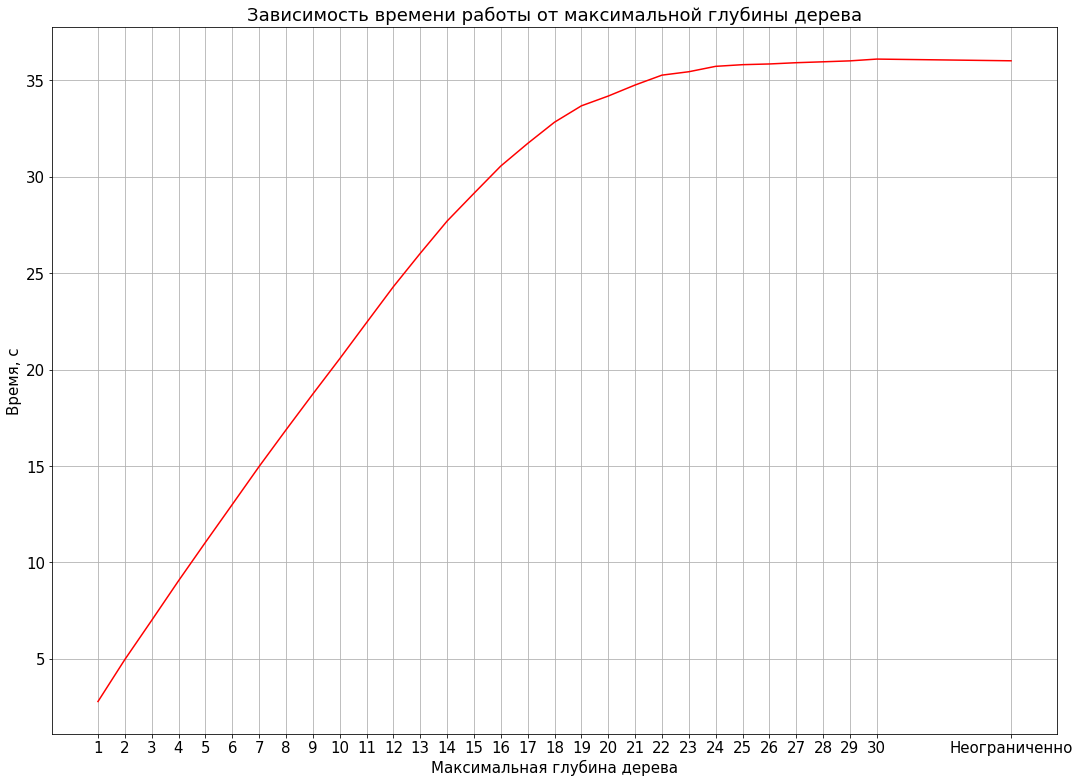

In [ ]:
plt.figure(figsize=(18,13))
plt.title('Зависимость времени работы от максимальной глубины дерева')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Время, с')
plt.plot(param_grid[:-1]+[35], times_d, c='r')
plt.xticks(ticks=param_grid[:-1]+[35], labels=param_grid[:-1]+['Неограниченно'])
plt.grid(True)
plt.rc('font', size=15)
plt.savefig(fname='RF_d_time', format='pdf')
plt.show()

# Градиентный бустинг

In [ ]:
model = GradientBoostingMSE(n_estimators=1000)
train_loss, val_loss, times = model.fit(**params)

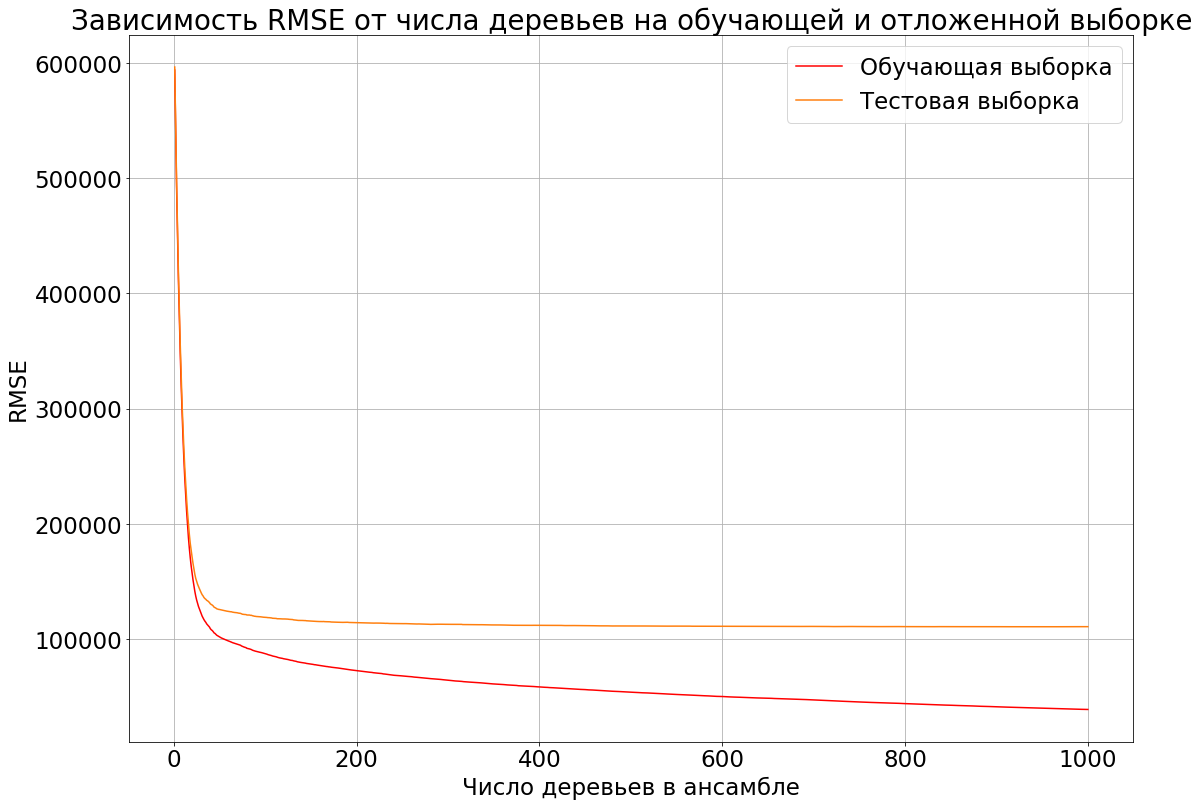

In [ ]:
plt.figure(figsize=(18,13))
plt.title('Зависимость RMSE от числа деревьев на обучающей и отложенной выборке')
plt.xlabel('Число деревьев в ансамбле')
plt.ylabel('RMSE')
plt.plot(np.arange(1000)+1, train_loss, label='Обучающая выборка', c='r')
plt.plot(np.arange(1000)+1, val_loss, label='Тестовая выборка', c='tab:orange')
plt.legend()
plt.grid(True)
plt.rc('font', size=23)
plt.savefig(fname='GB_tree_RMSE', format='pdf')
plt.show()

In [ ]:
optimal_num_train = np.argmin(train_loss) + 1
optimal_num_val = np.argmin(val_loss) + 1
print(f'Optimal trees number on train: {optimal_num_train}')
print(f'Best RMSE: {train_loss[optimal_num_train - 1]}')
print(f'Optimal trees number on validation: {optimal_num_val}')
print(f'Best RMSE: {val_loss[optimal_num_val - 1]}')

Optimal trees number on train: 1000
Best RMSE: 38969.845727238775
Optimal trees number on validation: 961
Best RMSE: 110734.51847299826


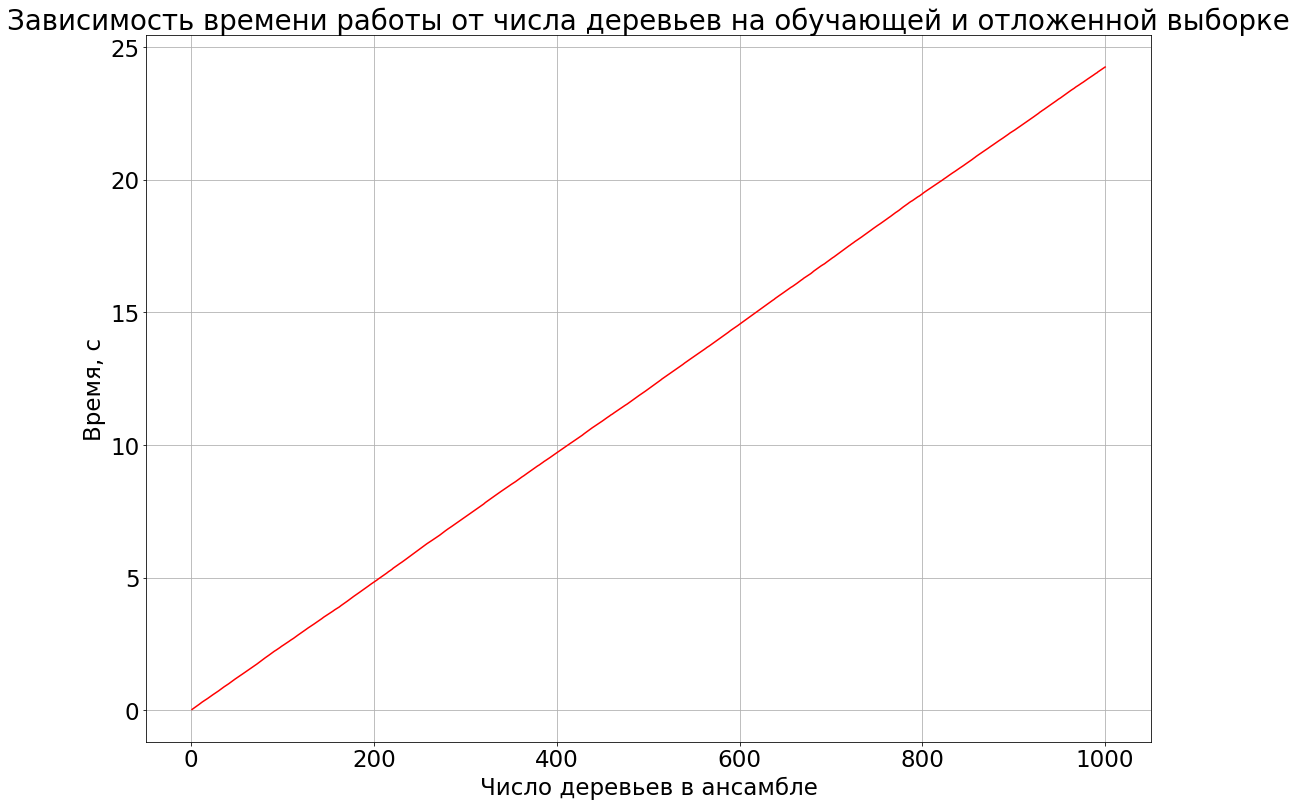

In [ ]:
plt.figure(figsize=(18,13))
plt.title('Зависимость времени работы от числа деревьев на обучающей и отложенной выборке')
plt.xlabel('Число деревьев в ансамбле')
plt.ylabel('Время, с')
plt.plot(np.arange(1000)+1, times, c='r')
plt.grid(True)
plt.rc('font', size=23)
plt.savefig(fname='GB_tree_time', format='pdf')
plt.show()

График функции потерь становится почти горизонтальной прямой после примерно 400 деревьев. Будем далее использовать данное значение как оптимальное. 

In [ ]:
train_loss_fs = []
val_loss_fs = []
times_fs = []
for i in range(1, X_train.shape[1] + 1):
    model = GradientBoostingMSE(n_estimators=400, feature_subsample_size=i)
    train_loss, val_loss, times = model.fit(**params)
    train_loss_fs.append(train_loss[-1])
    val_loss_fs.append(val_loss[-1])
    times_fs.append(times[-1])

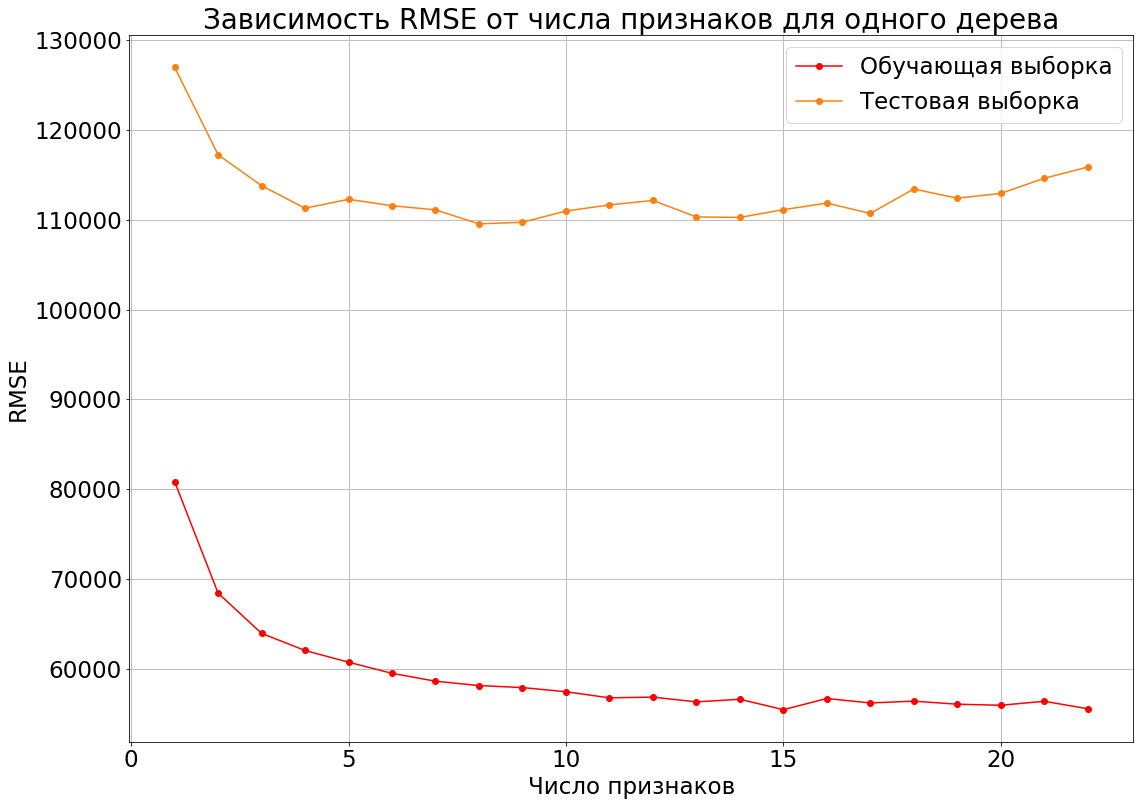

In [ ]:
plt.figure(figsize=(18,13))
plt.title('Зависимость RMSE от числа признаков для одного дерева')
plt.xlabel('Число признаков')
plt.ylabel('RMSE')
plt.plot(np.arange(X_train.shape[1])+1, train_loss_fs, label='Обучающая выборка', c='r', marker='o')
plt.plot(np.arange(X_train.shape[1])+1, val_loss_fs, label='Тестовая выборка', c='tab:orange', marker='o')
plt.legend()
plt.grid(True)
plt.rc('font', size=23)
plt.savefig(fname='GB_fs_RMSE', format='pdf')
plt.show()

In [ ]:
optimal_fnum_train = np.argmin(train_loss_fs) + 1
optimal_fnum_val = np.argmin(val_loss_fs) + 1
print(f'Optimal features number on train: {optimal_fnum_train}')
print(f'Best RMSE: {train_loss_fs[optimal_fnum_train - 1]}')
print(f'Optimal features number on validation: {optimal_fnum_val}')
print(f'Best RMSE: {val_loss_fs[optimal_fnum_val - 1]}')

Optimal features number on train: 15
Best RMSE: 55452.09289795777
Optimal features number on validation: 8
Best RMSE: 109534.8562063702


За оптимальное число признаков для дерева возьмем значение 8

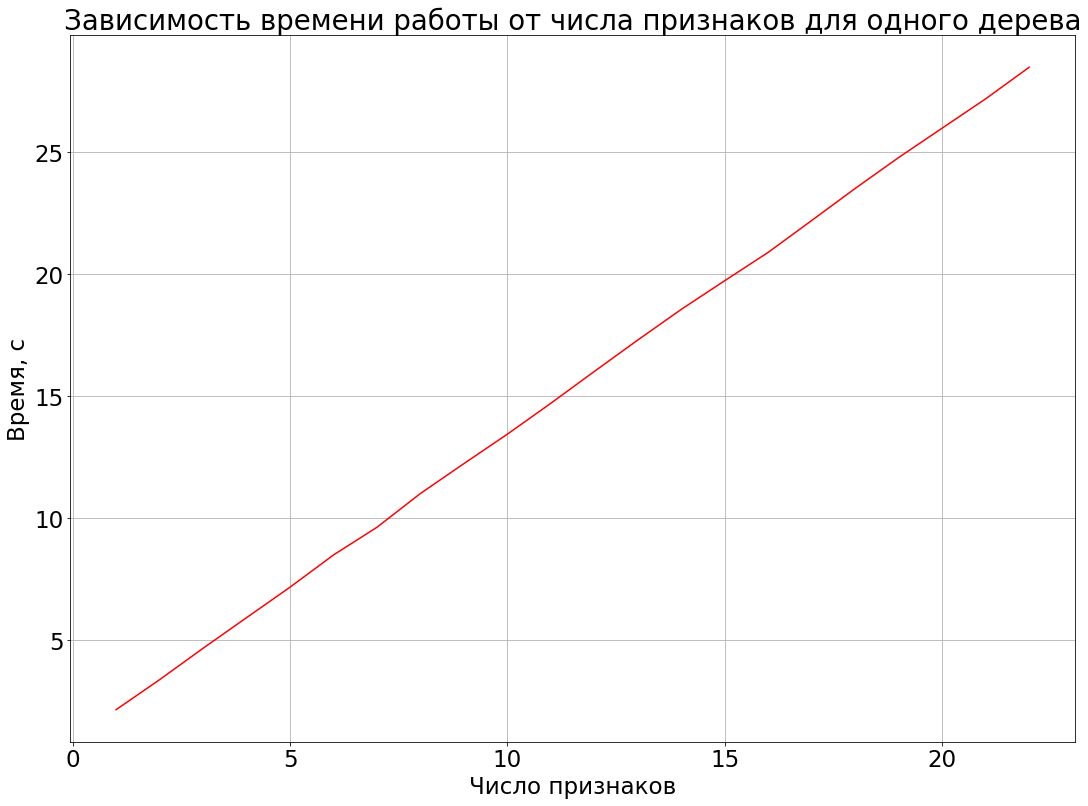

In [ ]:
plt.figure(figsize=(18,13))
plt.title('Зависимость времени работы от числа признаков для одного дерева')
plt.xlabel('Число признаков')
plt.ylabel('Время, с')
plt.plot(np.arange(X_train.shape[1])+1, times_fs, c='r')
plt.grid(True)
plt.rc('font', size=23)
plt.savefig(fname='GB_fs_time', format='pdf')
plt.show()

In [ ]:
train_loss_d = []
val_loss_d = []
times_d = []

param_grid = list(range(1, 31)) + [None]

for i in param_grid:
    model = GradientBoostingMSE(n_estimators=400, feature_subsample_size=8, max_depth=i)
    train_loss, val_loss, times = model.fit(**params)
    train_loss_d.append(train_loss[-1])
    val_loss_d.append(val_loss[-1])
    times_d.append(times[-1])

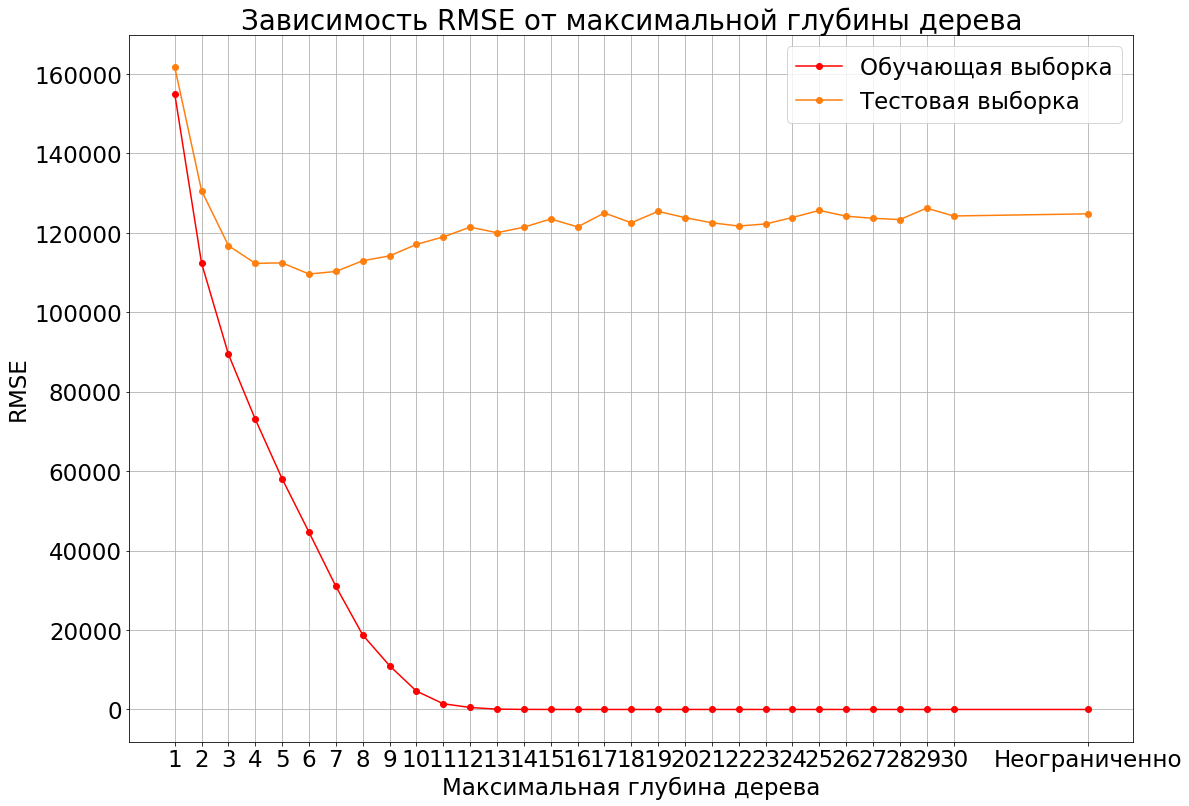

In [ ]:
plt.figure(figsize=(18,13))
plt.title('Зависимость RMSE от максимальной глубины дерева')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('RMSE')
plt.plot(param_grid[:-1]+[35], train_loss_d, label='Обучающая выборка', c='r', marker='o')
plt.plot(param_grid[:-1]+[35], val_loss_d, label='Тестовая выборка', c='tab:orange', marker='o')
plt.xticks(ticks=param_grid[:-1]+[35], labels=param_grid[:-1]+['Неограниченно'])
plt.legend()
plt.grid(True)
plt.rc('font', size=15)
plt.savefig(fname='GB_d_RMSE', format='pdf')
plt.show()

In [ ]:
optimal_dnum_train = np.argmin(train_loss_d) + 1
optimal_dnum_val = np.argmin(val_loss_d) + 1
print(f'Optimal max depth on train: {optimal_dnum_train}')
print(f'Best RMSE: {train_loss_d[optimal_dnum_train - 1]}')
print(f'Optimal max depth on validation: {optimal_dnum_val}')
print(f'Best RMSE: {val_loss_d[optimal_dnum_val - 1]}')

Optimal max depth on train: 20
Best RMSE: 0.00011217913669687319
Optimal max depth on validation: 6
Best RMSE: 109648.36239144095


Будем считать оптимальной глубину, равную 6

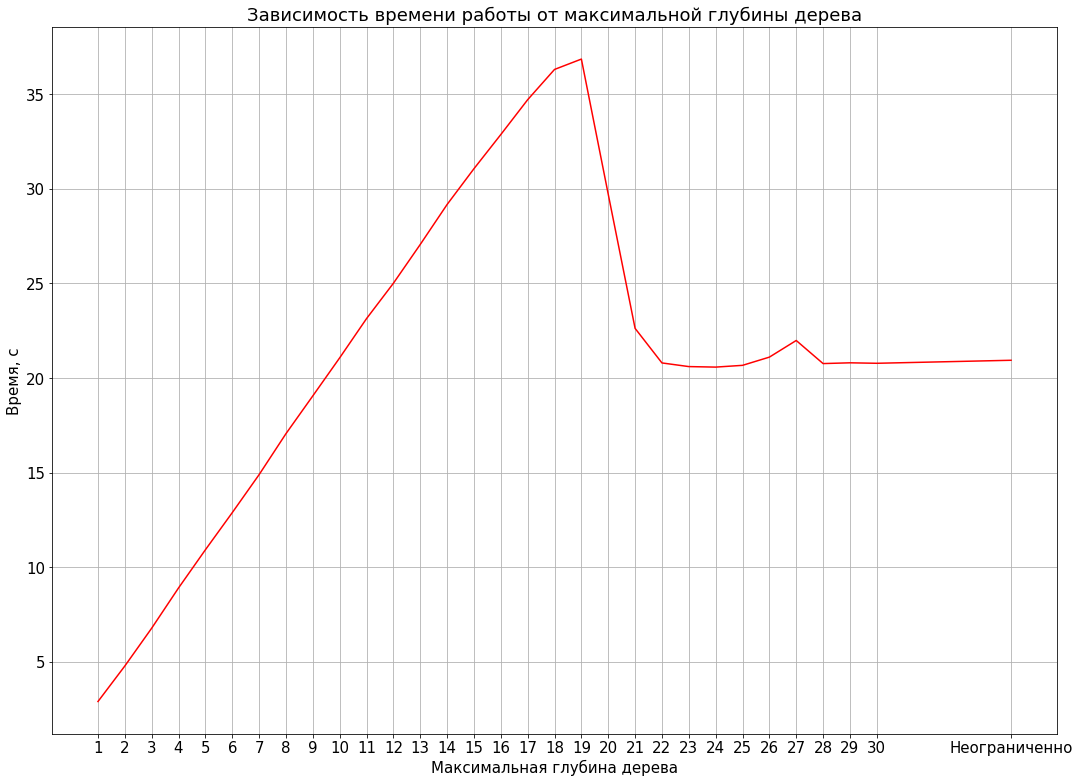

In [ ]:
plt.figure(figsize=(18,13))
plt.title('Зависимость времени работы от максимальной глубины дерева')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Время, с')
plt.plot(param_grid[:-1]+[35], times_d, c='r')
plt.xticks(ticks=param_grid[:-1]+[35], labels=param_grid[:-1]+['Неограниченно'])
plt.grid(True)
plt.rc('font', size=15)
plt.savefig(fname='GB_d_time', format='pdf')
plt.show()

Рассмотрим различные значения темпа обучения при 1000 деревьев для более детального рассмотрения динамики изменения RMSE

In [ ]:
learning_rates = [1e-4, 1e-3, 1e-2, 0.1, 0.5, 1]
train_loss_lr = []
val_loss_lr = []
times_lr = []

for learning_rate in learning_rates:
    model = GradientBoostingMSE(n_estimators=1000, feature_subsample_size=8, max_depth=6, learning_rate=learning_rate)
    train_loss, val_loss, times = model.fit(**params)
    train_loss_lr.append(train_loss)
    val_loss_lr.append(val_loss)
    times_lr.append(times)

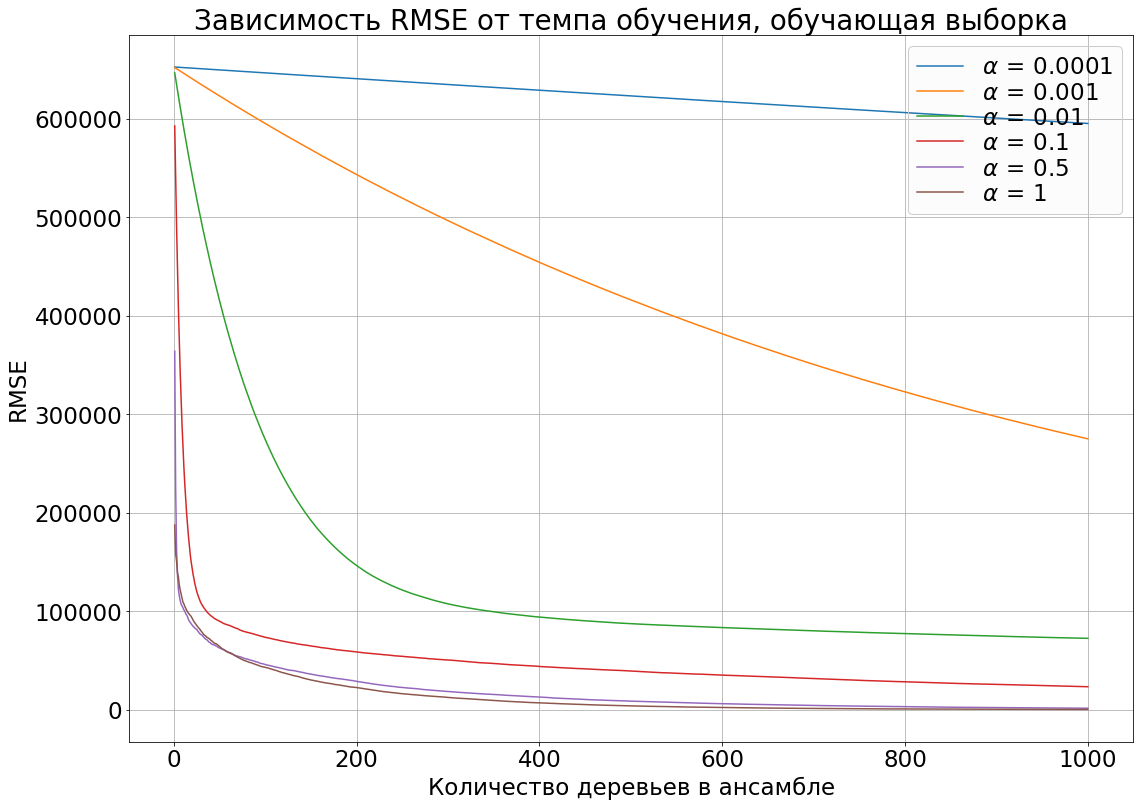

In [ ]:
plt.figure(figsize=(18,13))
plt.title('Зависимость RMSE от темпа обучения, обучающая выборка')
plt.xlabel('Количество деревьев в ансамбле')
plt.ylabel('RMSE')
for train_l, lr in zip(train_loss_lr, learning_rates):
    plt.plot(np.arange(1000)+1, train_l, label=f'$\\alpha\,=\,${lr:g}')
legend = plt.legend(labelspacing=0.1, loc='upper right')
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)
plt.rc('font', size=23)
plt.savefig(fname='GB_lr_RMSE', format='pdf')
plt.show()

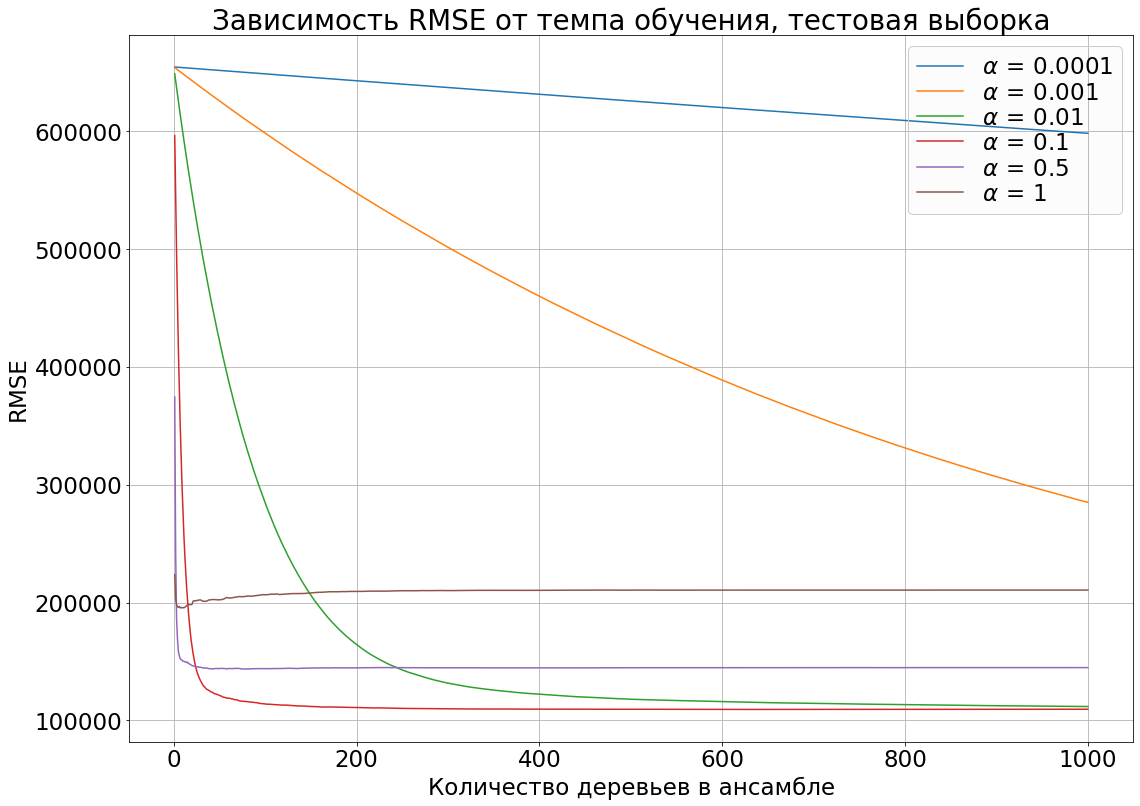

In [ ]:
plt.figure(figsize=(18,13))
plt.title('Зависимость RMSE от темпа обучения, тестовая выборка')
plt.xlabel('Количество деревьев в ансамбле')
plt.ylabel('RMSE')
for val_l, lr in zip(val_loss_lr, learning_rates):
    plt.plot(np.arange(1000)+1, val_l, label=f'$\\alpha\,=\,${lr:g}')
legend = plt.legend(labelspacing=0.1, loc='upper right')
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0.1, 0.01))
plt.grid(True)
plt.rc('font', size=23)
plt.savefig(fname='GB_lr_RMSE_test', format='pdf')
plt.show()

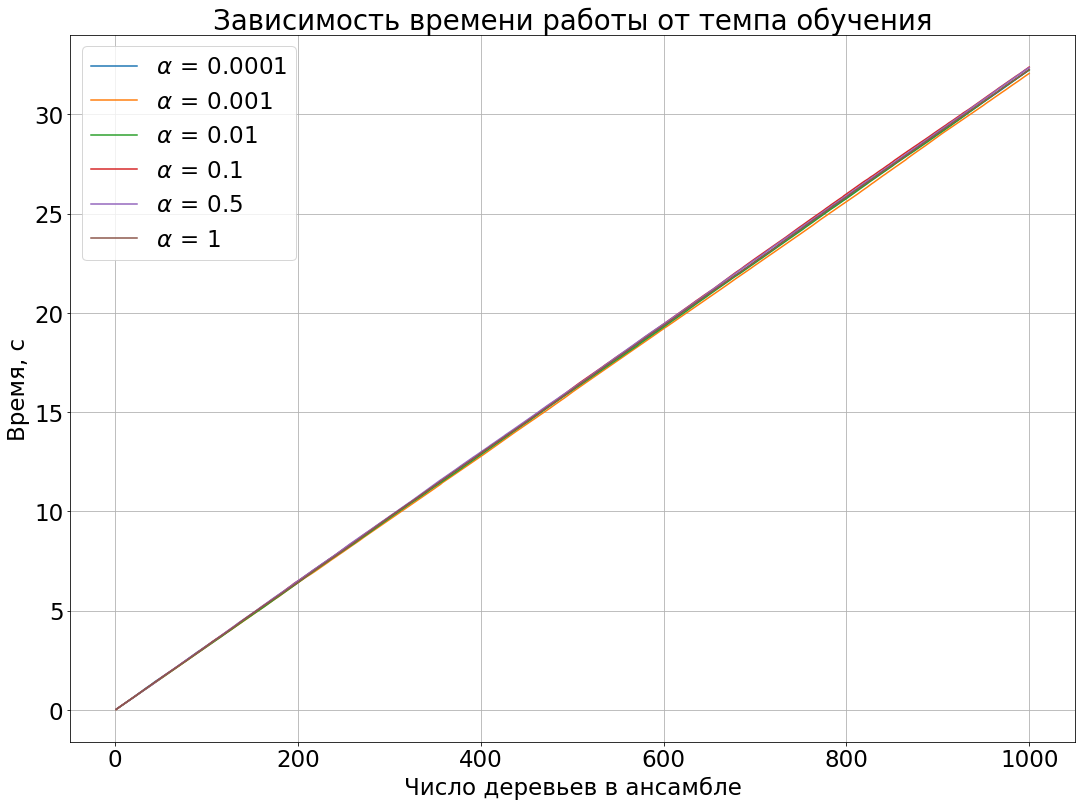

In [ ]:
plt.figure(figsize=(18,13))
plt.title('Зависимость времени работы от темпа обучения')
plt.xlabel('Число деревьев в ансамбле')
plt.ylabel('Время, с')
for time, lr in zip(times_lr, learning_rates):
    plt.plot(np.arange(1000)+1, time, label=f'$\\alpha\,=\,${lr:g}')
#plt.plot(np.arange(1000)+1, times, c='r')
plt.legend()
plt.grid(True)
plt.rc('font', size=23)
plt.savefig(fname='GB_lr_time', format='pdf')
plt.show()